# MLCC - Laboratory 3 - Dimensionality reduction and feature selection
In this laboratory we will address the problem of data analysis with a reference to a classification problem. 
Follow the instructions below.

In [1]:
# Import the 
from impFunction import *


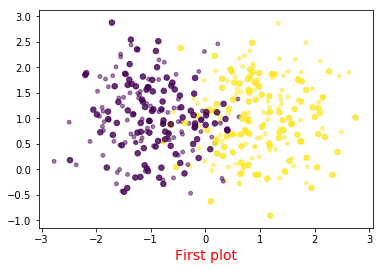

In [3]:
# main1
N = 100;
D = 30;
Xtr, Ytr = MixGauss(np.matrix([[1,-1],[1,1]]),np.array([[0.7], [0.7]]),N);
Xtr = np.concatenate(Xtr, axis=0)
Ytr = np.concatenate(Ytr, axis=0)
Ytr[Ytr==2]= -1;
Xts, Yts = MixGauss(np.matrix([[1,-1],[1,1]]),np.array([[0.7],[0.7]]),N);
Xts = np.concatenate(Xts, axis=0)
Yts = np.concatenate(Yts, axis=0)
Yts[Yts==2] = -1;

plt.scatter(Xtr[:,0], Xtr[:,1], s=15, c=Ytr, alpha=0.5)
plt.scatter(Xts[:,0], Xts[:,1], s=30, c=Yts, alpha=0.8)
plt.xlabel('First plot', fontsize=14, color='red')
plt.show()
# plt.title('First plot')

/home/suraj/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


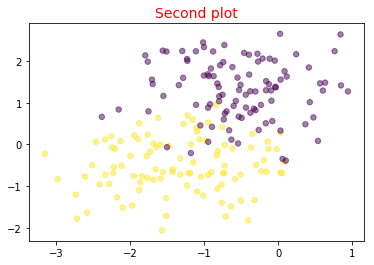

In [6]:
sigma_noise = 0.01;

Xtr_noise = sigma_noise * np.random.randn(2*N, D-2);
Xts_noise = sigma_noise * np.random.randn(2*N, D-2);

Xtr = np.concatenate((Xtr, Xtr_noise), axis=1)
Xts = np.concatenate((Xts, Xts_noise), axis=1)

V, d, X_proj = PCA(Xtr, 2)

plt.scatter(X_proj[:,0], X_proj[:,1], s=30, c=Ytr, alpha=0.5)
plt.title('Second plot', fontsize=14, color='red')
plt.show()

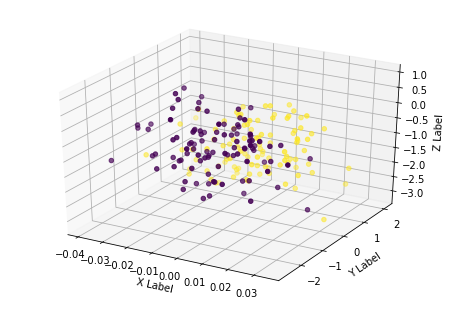

In [7]:
V, d, X_proj = PCA(Xtr, 3)

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)

x = X_proj[:,0].real
y = X_proj[:,1].real
z = X_proj[:,2].real

ax.scatter(x, y, z, c=Ytr, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

pyplot.show()

[ 1.25326411+0.j  1.19810345+0.j  0.01386223+0.j]


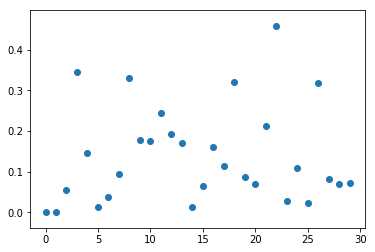

In [11]:
V, d, X_proj = PCA(Xtr, 3);
print(np.sqrt(d[:10]));

plt.scatter(list(range(D)), abs(V[:,0]))
plt.show()

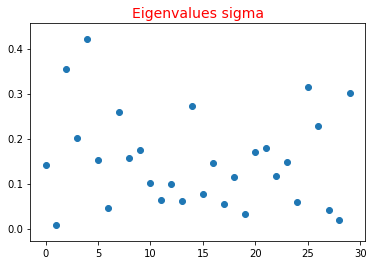

/home/suraj/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


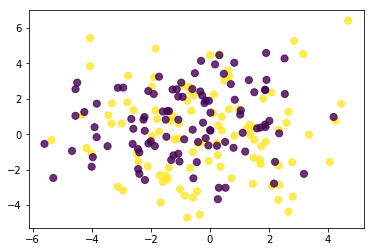

In [12]:
## Test on different sigma
Xtr, Ytr = MixGauss(np.matrix([[1,-1],[1,1]]),np.array([[0.7], [0.7]]),N);
Xtr = np.concatenate(Xtr, axis=0)
Ytr = np.concatenate(Ytr, axis=0)
Ytr[Ytr==2]= -1;

Xts, Yts = MixGauss(np.matrix([[1,-1],[1,1]]),np.array([[0.7],[0.7]]),N);
Xts = np.concatenate(Xts, axis=0)
Yts = np.concatenate(Yts, axis=0)
Yts[Yts==2] = -1;

sigma_noise = [0, 0.01, 0.1, 0.5, 0.7, 1, 1.2, 1.4, 1.6, 2]

Xtr_noise = sigma_noise[9] * np.random.randn(2*N, D-2);

Xtr2 = np.concatenate((Xtr, Xtr_noise), axis=1)

V, d, X_proj = PCA(Xtr2, 10)

plt.scatter(list(range(D)), abs(V[:,0]));
plt.title('Eigenvalues sigma',fontsize=14, color='red')
plt.show()

plt.scatter(X_proj[:,1], X_proj[:,2], 50, Ytr, alpha=0.8);
plt.show()
## completion of main1
## first plot of eigen values sigma still not matching

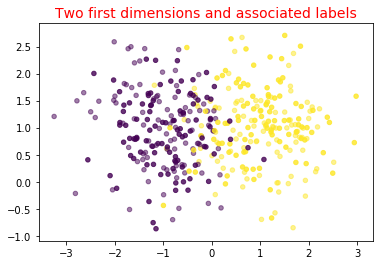

In [2]:
## main2

N = 100
D = 30

Xtr, Ytr = MixGauss(np.matrix([[1,-1],[1,1]]),np.array([[0.7], [0.7]]),N);
Xtr = np.concatenate(Xtr, axis=0)
Ytr = np.concatenate(Ytr, axis=0)
Ytr[Ytr==2]= -1;

Xts, Yts = MixGauss(np.matrix([[1,-1],[1,1]]),np.array([[0.7],[0.7]]),N);
Xts = np.concatenate(Xts, axis=0)
Yts = np.concatenate(Yts, axis=0)
Yts[Yts==2] = -1;

plt.scatter(Xtr[:,0], Xtr[:,1], s=20, c=Ytr, alpha=0.5);
plt.scatter(Xts[:,0], Xts[:,1], s=20, c=Yts, alpha=0.8);
plt.title('Two first dimensions and associated labels', fontsize=14, color='red');
plt.show()

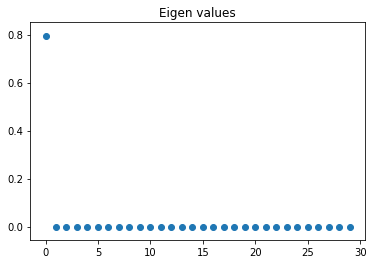

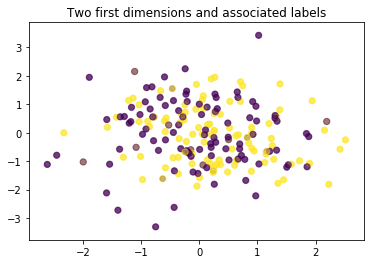

In [3]:
sigma_noise = 0.01;
Xtr_noise = sigma_noise * np.random.randn(2*N, D-2);
Xts_noise = sigma_noise * np.random.randn(2*N, D-2);

Xtr = np.concatenate((Xtr, Xtr_noise), axis=1)
Xts = np.concatenate((Xts, Xts_noise), axis=1)

# Normalize

m = np.mean(Xtr, axis=0)
s = np.std(Xtr, axis=0)

for i in range(2*N):
    Xtr[i, :] = Xtr[i, :] - m
    Xts[i, :] = Xts[i, :] - m
    
for i in range(2*N):
    Xtr[i, :] = Xtr[i, :] / s
    Xts[i, :] = Xts[i, :] / s
    
w, r, I = OMatchingPursuit(Xtr, Ytr, 2)

Ypred = np.sign(Xts.dot(w))

err = calcErr(Yts, Ypred);

plt.scatter(list(range(D)), abs(w))
plt.title('Eigen values');
plt.show()

plt.scatter(Xts[:,1], Xts[:,2], 30, Yts, alpha=0.5);
plt.scatter(Xts[:,1], Xts[:,2], 40, Ypred, alpha=0.5);
plt.title('Two first dimensions and associated labels', );
plt.show()    

In [ ]:
intIter = list(range(D))
perc = 0.75
nrip = 20
it, Vm, Vs, Tm, Ts = holdoutCVOMP(Xtr, Ytr, perc, nrip, intIter)

# figure;
plt.plot(intIter, Tm, 'r+');
# hold on;
plt.plot(intIter, Vm, 'b+');
# hold on;
plt.title('Cross validation results', fontsize=20, color='red'); 
# plt.legend('Training error','Validation error'); 
plt.xlabel('Number of dimension', fontsize=12, color='red'); 
plt.ylabel('error', fontsize=12, color='red');
plt.show()